In [73]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
import matplotlib.pyplot as plt

In [74]:
### using asian paints company's data for analysis

with open('M:/BSE_df/ASIANPAINT.BO.csv','rb') as file:
    df_AP = pickle.load(file)
df_AP.head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771


In [75]:
### Creating 3 exponential moving averages of different spans 

In [76]:
df_AP['shortma'] = df_AP['Adj Close'].ewm(span=5, adjust=True).mean()
df_AP['midma'] = df_AP['Adj Close'].ewm(span=20,adjust=True).mean()
df_AP['longma'] = df_AP['Adj Close'].ewm(span=60,adjust=True).mean()

In [77]:
df_AP.head()

,High,Low,Open,Close,Volume,Adj Close,shortma,midma,longma
Date,,,,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519,1122.931519,1122.931519,1122.931519
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445,1120.786475,1121.054605,1121.114190
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578,1119.297260,1119.801729,1119.918202
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421,1131.201835,1127.929553,1127.282062
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771,1142.032777,1135.545802,1134.144272


In [78]:
### visulization of moving averages and Adj close price

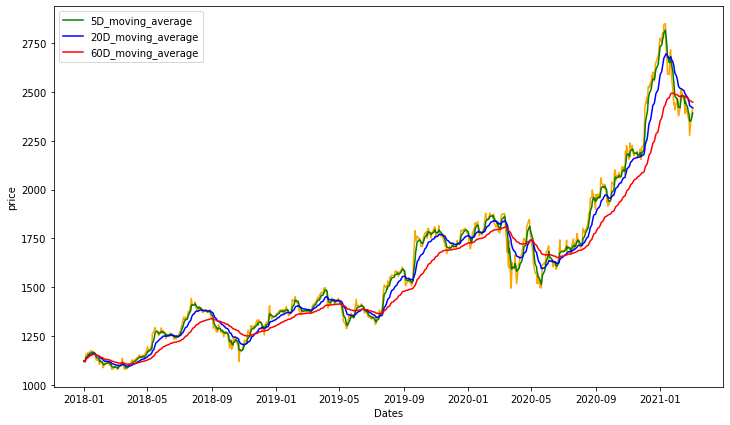

In [79]:
plt.figure(figsize=(12,7))
plt.plot(df_AP.index,df_AP['Adj Close'],color='orange')
plt.plot(df_AP.index,df_AP['shortma'],color='green', label = '5D_moving_average')
plt.plot(df_AP.index,df_AP['midma'],color='blue',label = '20D_moving_average')
plt.plot(df_AP.index,df_AP['longma'],color='red',label = '60D_moving_average')
plt.xlabel('Dates')
plt.ylabel("price")
plt.legend()
plt.show()

In [80]:
### creating a function to determine when to buy or sell
# assumptions are you can not short sell and you need to buy and sell same amount of shares all the time
# you can easily change the assumptions by removing flag condition in if and elif statements

In [322]:
def buy_sell(df):
    buy_lst = []
    sell_lst = []
    flag = 0
    num = []
    number = 0
    rs = 100000

    for i in range(len(df)):
        if rs > 0:
            if df['longma'][i] > df['shortma'][i] and flag != 0:
                sell_lst.append(df['Adj Close'][i])
                buy_lst.append(np.nan) 
                flag = 0
                rs = rs + df['Adj Close'][i]*number
                number = 0
            elif df['midma'][i] > df['longma'][i] > df['shortma'][i] and flag != 0:
                sell_lst.append(df['Adj Close'][i])
                buy_lst.append(np.nan) 
                flag = 0 
                rs = rs + df['Adj Close'][i]*number
                number = 0
                
            elif df['Adj Close'][i]/df['Adj Close'][i-7] - 1 > 0.15 and flag != 0:
                sell_lst.append(df['Adj Close'][i])
                buy_lst.append(np.nan) 
                flag = 0 
                rs = rs + df['Adj Close'][i]*number
                number = 0
                    
                
            elif df['midma'][i-3] > df['shortma'][i-3] > df['longma'][i] and df['midma'][i] > df['shortma'][i] and flag != 0:
                sell_lst.append(df['Adj Close'][i])
                buy_lst.append(np.nan) 
                flag = 0 
                rs = rs + df['Adj Close'][i]*number
                number = 0     

            elif flag != 1:
                try:
                    if df['shortma'][i-3] == min(df['shortma'][i-3],df['midma'][i-3]) and df['shortma'][i] > df['midma'][i]:
                        buy_lst.append(df['Adj Close'][i])
                        sell_lst.append(np.nan)
                        flag = 1
                        number = int(rs/df['Adj Close'][i])
                        rs = rs -  df['Adj Close'][i]*number
                        num.append(number)
                    else:
                        buy_lst.append(np.nan)
                        sell_lst.append(np.nan)     
                        
                except:
                    buy_lst.append(np.nan)
                    sell_lst.append(np.nan)
                    
            else:
                buy_lst.append(np.nan)
                sell_lst.append(np.nan) 
      
       
        else:
            buy_lst.append(np.nan)
            sell_lst.append(np.nan)
                 
    return buy_lst,sell_lst,num
            
            

In [323]:
df_AP['buy_price'] = buy_sell(df_AP)[0]
df_AP['sell_price'] = buy_sell(df_AP)[1]
num = buy_sell(df_AP)[2]

In [324]:
### green marker shows the time to buy and red to sell

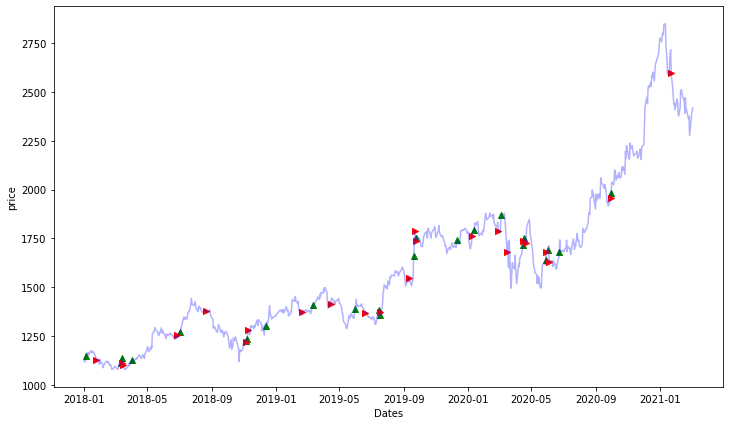

In [325]:
plt.figure(figsize=(12,7))
plt.plot(df_AP.index,df_AP['Adj Close'],color='blue',alpha = 0.3)
plt.scatter(df_AP.index,df_AP['buy_price'],color='green', marker = '^', alpha = 1)
plt.scatter(df_AP.index,df_AP['sell_price'],color='red', marker = '>', alpha = 1)
plt.xlabel('Dates')
plt.ylabel('price')
plt.show()

In [326]:
buy_list = pd.Series(buy_sell(df_AP)[0])
sell_list = pd.Series(buy_sell(df_AP)[1])


In [327]:
buy_list.dropna(inplace=True)
sell_list.dropna(inplace=True)


In [329]:
# profit you will get if you would follow this stretagy, excluding taxes and other fees
profit = 0
for i in range(len(sell_list)):    
    profit = profit + (sell_list.values[i] - buy_list.values[i])*num[i]
print(profit)

104474.37219238281
